**ARIMA:** https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average


*   **Autoregressive (p):** No. of lag observations included in the model (how many past values to consider). Higher p, if past values influence future ones strongly

*   **Integrated (d):** No. of times the raw observations are differenced to make the data stationary. Higher d, if the data has a trend (non-stationary)

*   **Moving Average (q):** No. of lagged forecast errors to include in the model. Higher q, if errors from recent forecasts are informative




In [33]:
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
data = {
    'Month': pd.date_range(start='2013-01-01', periods=144, freq='M'),
    'Passengers': [
        112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,
        115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140,
        145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
        171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194,
        196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201,
        204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229,
        242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278,
        284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306,
        315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336,
        340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337,
        360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405,
        417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432
    ]
}

<ipython-input-34-73d4271307ca>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month': pd.date_range(start='2013-01-01', periods=144, freq='M'),


<ipython-input-35-9e786ba9b892>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.asfreq('M')


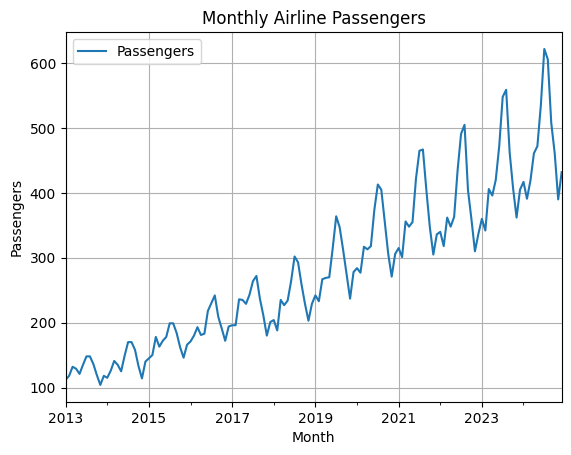

In [35]:
df = pd.DataFrame(data)
df.set_index('Month', inplace=True)
df = df.asfreq('M')
df.plot(title = 'Monthly Airline Passengers')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

In [36]:
model = ARIMA(df, order=(2, 1, 2))  # p = 2, d = 1, q = 2
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Sat, 19 Apr 2025   AIC                           1353.347
Time:                        14:37:26   BIC                           1368.161
Sample:                    01-31-2013   HQIC                          1359.366
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


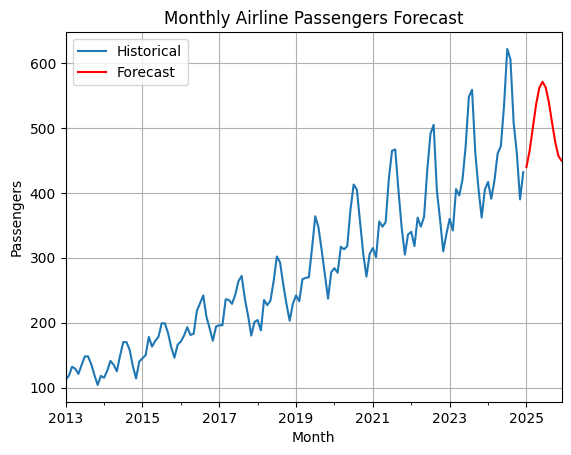

In [37]:
# forecast next 12 months
#Qualitative Analysis

forecast = model_fit.forecast(steps=12)
df['Passengers'].plot(label='Historical')
forecast.plot(label='Forecast', color='red')
plt.legend(loc='best')
plt.title('Monthly Airline Passengers Forecast')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

In [38]:
# Quantitative Analysis

train = df.iloc[ : -12]
test = df.iloc[-12 : ]

model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)

rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast))
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 55.22283915688796


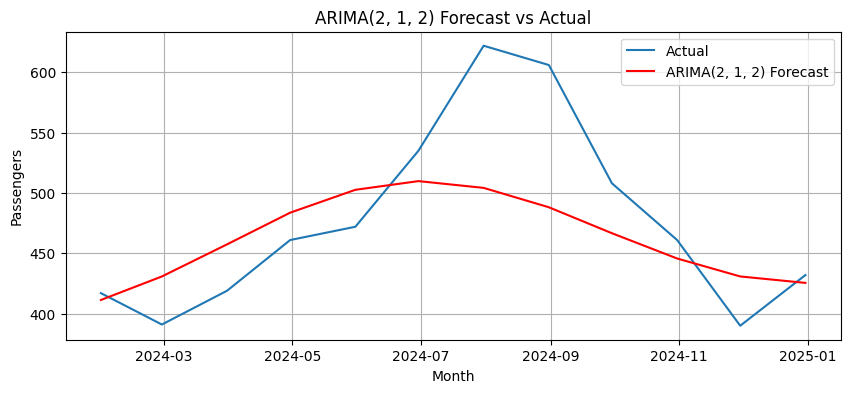

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


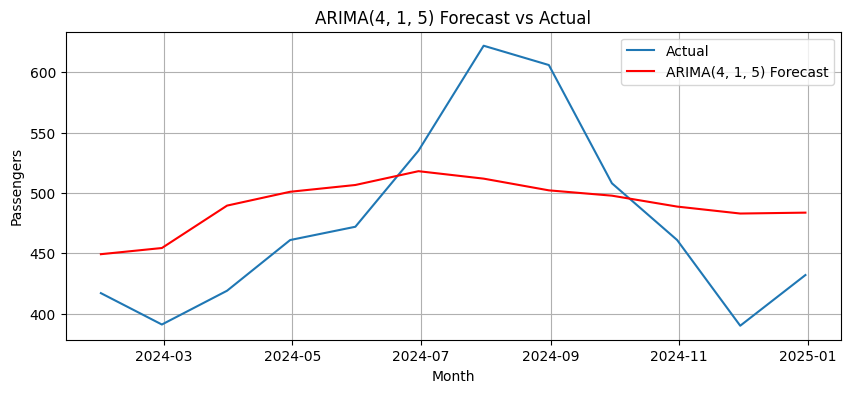

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


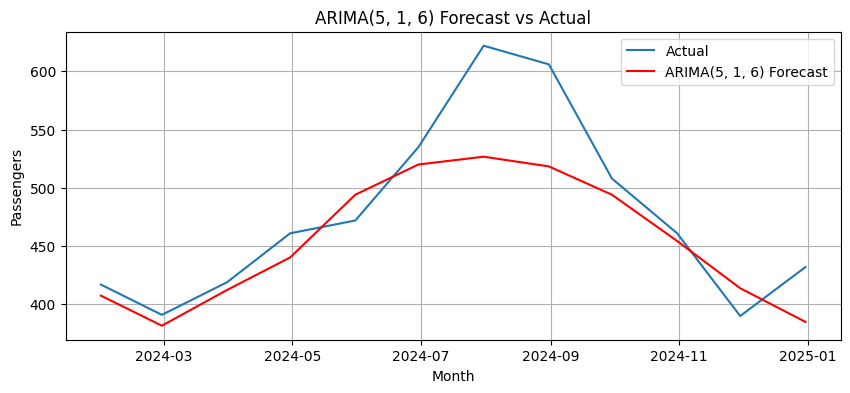

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


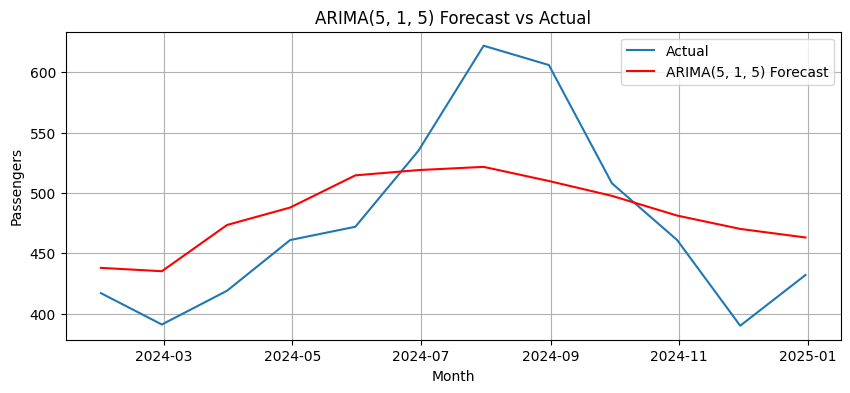

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


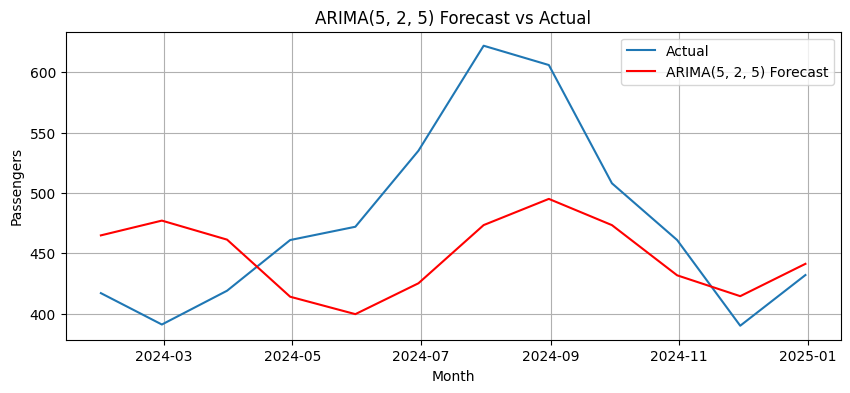

In [43]:
#(p,d,q) order
orders = [(2,1,2) , (4,1,5), (5,1,6), (5,1,5), (5, 2, 5)]

results = []

for i in orders:
  model = ARIMA(train['Passengers'], order=i)
  model_fit = model.fit()
  forecast = model_fit.forecast(steps=12)
  rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast))
  results.append((i, rmse))

  #Plot
  plt.figure(figsize=(10,4))
  plt.plot(test.index, test['Passengers'], label='Actual')
  plt.plot(test.index, forecast, color='red', label = f'ARIMA{i} Forecast')
  plt.title(f'ARIMA{i} Forecast vs Actual')
  plt.xlabel('Month')
  plt.ylabel('Passengers')
  plt.legend()
  plt.grid(True)
  plt.show()



In [44]:
for order, rmse in results:
  print(f'ARIMA{order} - RMSE: {rmse}')

ARIMA(2, 1, 2) - RMSE: 55.22283915688796
ARIMA(4, 1, 5) - RMSE: 63.38554887169179
ARIMA(5, 1, 6) - RMSE: 41.957345956136706
ARIMA(5, 1, 5) - RMSE: 54.29955208552259
ARIMA(5, 2, 5) - RMSE: 75.35233295675448


In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

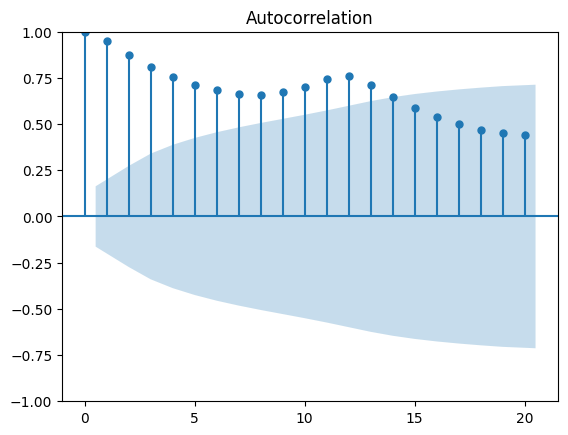

In [51]:
# ACF: auto-correlation function
plot_acf(df['Passengers'], lags=20)
plt.show()

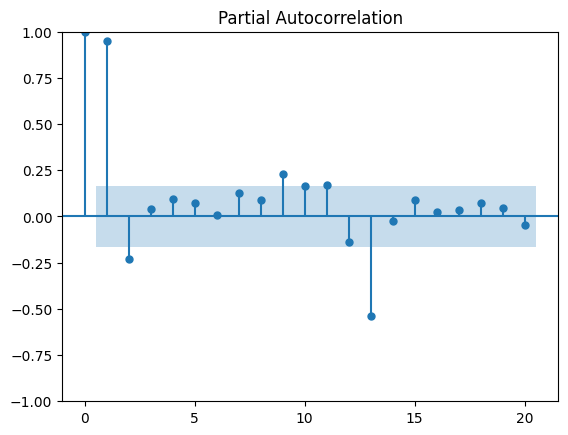

In [54]:
# PACF: partial auto-correlation
# ywm = Yule-Walker Modified
plot_pacf(df['Passengers'], lags=20, ax=plt.gca(), method='ywm')
plt.show()

# **Home Work:**

Try to find a sales/ stock-related data, and try to predict futire sales/ stock price.

You may use some weather-related data.

May use: https://github.com/vijendra-code/Time-Series-Forecasting/blob/master/shampoo.csv


Predictive analysis related to time, is highly dependent on the past.

Therefore, if there was no accidental events occurred in the past, then the predictive model can't predict the future accidental events.

Also, it is not guranteed, even your model saw some past accidental events, it can predict the future accidental events.

# **Reading Home-work:**
correlation, co-variance, auto-correlation

In [48]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.2 MB/s eta 0:00:00


# How to pick optimal (p,d,q)?

In [49]:
from pmdarima import auto_arima

# auto_arima automatically selects the possibly the optimal p,d,q values

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
model = auto_arima(df['Passengers'], seasonal=False, trace=True)
print(model.summary())